In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import tensorflow as tf 
import os 
import random
from pecnet import Pecnet
from scipy.fft import fft, fftfreq
from scipy.signal import welch
import matplotlib.pyplot as plt
from PyEMD import EMD


# This is for experiment consistency. 
def reset_random_seeds(seed):
   os.environ['PYTHONHASHSEED']=str(seed)
   tf.random.set_seed(seed)
   np.random.seed(seed)
   random.seed(seed)
reset_random_seeds(42)

In [2]:
# Load data from the text file
with open('data/IBM.txt', 'r') as file:
    lines = file.readlines()
    values = []
    dates = []

    for line in lines[1:]:
        parts = line.strip().split(',')
        date = parts[0]
        if '1980-12-12' <= date <= '2022-07-22':
            dates.append(date)
            values.append(float(parts[4]))  # 'Close' column

# Create a DataFrame from the loaded data
df = pd.DataFrame({'Date': pd.to_datetime(dates), 'Value': values})

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Extract the values from the DataFrame
signal = df['Value'].values
signal

array([ 15.714627,  15.41587 ,  15.83413 , ..., 129.179993, 127.150002,
       128.25    ])

# EXP-1: STANDART VALUES

In [3]:
window_sizes_1 = [1,4,8]
window_sizes_2 = [1,5,20]
window_sizes_3 = [1,7,30]

In [4]:
pecnet = Pecnet(experiment_name="IBM_exp1_1",
                sampling_periods=window_sizes_1,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

262/262 [==============================] - 0s 279us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


262/262 [==============================] - 0s 291us/step
Final train scores: RMSE: 50.088584899902344, R2: 0.029448082258925368, MAPE: 0.8992617130279541
66/66 [==============================] - 0s 559us/step
RMSE:  37.655136
R2:  -3.543018651098781
MAPE:  0.21838363


In [5]:
pecnet = Pecnet(experiment_name="IBM_exp1_2",
                sampling_periods=window_sizes_2,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

261/261 [==============================] - 0s 296us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


261/261 [==============================] - 0s 282us/step
Final train scores: RMSE: 51.489986419677734, R2: -0.02104131613337268, MAPE: 0.7487995028495789
65/65 [==============================] - 0s 281us/step
RMSE:  31.829887
R2:  -2.331128129916205
MAPE:  0.16149488


In [6]:
pecnet = Pecnet(experiment_name="IBM_exp1_3",
                sampling_periods=window_sizes_3,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

260/260 [==============================] - 0s 279us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


260/260 [==============================] - 0s 289us/step
Final train scores: RMSE: 45.54108428955078, R2: 0.2040757629558546, MAPE: 0.6242666244506836
65/65 [==============================] - 0s 272us/step
RMSE:  36.89281
R2:  -3.572562279302038
MAPE:  0.22719353


# EXP-2.1: FFT VALUES

In [7]:
def get_fft(signal, fs):
    fourier = np.fft.fft(signal)
    n= len(signal)
    frequencies = np.fft.fftfreq(n, d=1/fs) 
    positive_frequencies = frequencies[np.where(frequencies>0)] 
    magnitudes = abs(fourier[np.where(frequencies >0)])
    return positive_frequencies, magnitudes

0


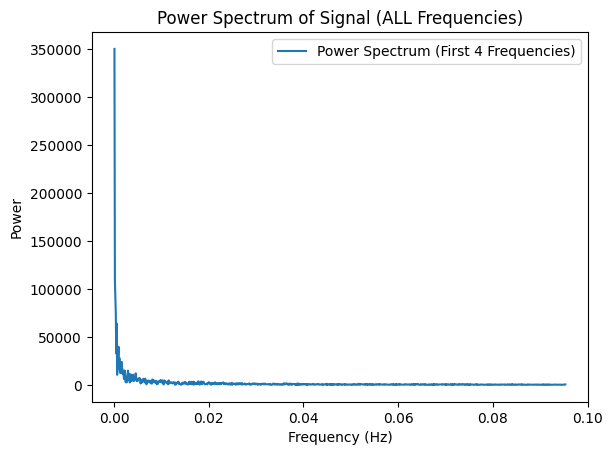

In [8]:
fs = 1

positive_frequencies, magnitudes = get_fft(signal, fs)
peak_frequency = np.argmax(magnitudes)
print(peak_frequency)
plt.plot(positive_frequencies[:1000], magnitudes[:1000], label='Power Spectrum (First 4 Frequencies)')
plt.title('Power Spectrum of Signal (ALL Frequencies)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

In [9]:
def en_buyuk_uc_indexleri_bul(array):
    if len(array) < 3:
        print("Dizi en az 3 eleman içermelidir.")
        return
    
    sirali_dizi = sorted(enumerate(array), key=lambda x: x[1], reverse=True)
    en_buyuk_uc_indexler = [index for index, value in sirali_dizi[:3]]
    sirali_dizi_indexler = [index for index, value in sirali_dizi]
    
    return en_buyuk_uc_indexler, sirali_dizi_indexler

top_3_idx, sorted_idx = en_buyuk_uc_indexleri_bul(magnitudes)

print("Power spectrumda En büyük üç değerin index'leri:", top_3_idx)
for idx in top_3_idx:
    print("En büyük üç değerin frekansları:", positive_frequencies[idx])
    print("En büyük üç değerin windowları:", (round(1 / (positive_frequencies[idx]))))

Power spectrumda En büyük üç değerin index'leri: [0, 1, 2]
En büyük üç değerin frekansları: 9.53197979220284e-05
En büyük üç değerin windowları: 10491
En büyük üç değerin frekansları: 0.0001906395958440568
En büyük üç değerin windowları: 5246
En büyük üç değerin frekansları: 0.0002859593937660852
En büyük üç değerin windowları: 3497


In [10]:
def select_meaningful_periods(positive_frequencies, sorted_idx):
    top_freqs = [positive_frequencies[idx] for idx in sorted_idx]
    top_periods = [round(1 / freq) for freq in top_freqs]
    # select periods that are less than 0.1% of the signal length
    top_periods_eliminated = [period for period in top_periods if period < len(signal)*0.001]
    # remove reduntant periods without losing order
    top_periods_final = []
    for period in top_periods_eliminated:
        if period not in top_periods_final:
            top_periods_final.append(period)
    return top_periods_final

In [11]:
periods = select_meaningful_periods(positive_frequencies, sorted_idx)
periods[:2]

[10, 9]

In [12]:
window_length_fft = [1,9,10]

In [13]:
pecnet = Pecnet(experiment_name="IBM_exp2_1",
                sampling_periods=window_length_fft,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

262/262 [==============================] - 0s 278us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


262/262 [==============================] - 0s 291us/step
Final train scores: RMSE: 60.76310348510742, R2: -0.42762065575328956, MAPE: 1.0409172773361206
66/66 [==============================] - 0s 280us/step
RMSE:  51.17217
R2:  -7.415772611889228
MAPE:  0.3224788


# EXP-2.2: WELCH VALUES

0


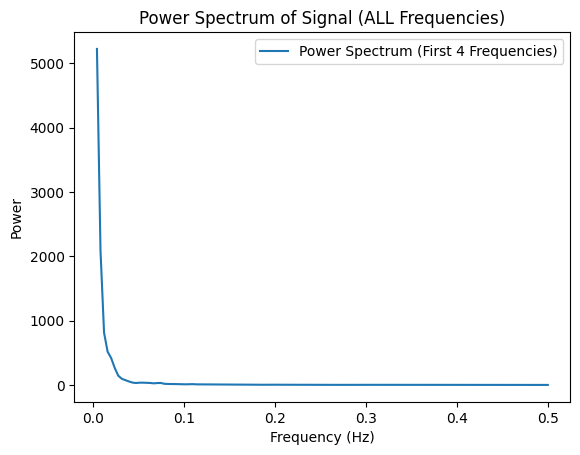

In [14]:
# https://ataspinar.com/2018/04/04/machine-learning-with-signal-processing-techniques/

def get_psd_values(y_values, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    # return only positive frequencies and respective PSD values
    positive_frequencies = f_values[np.where(f_values>0)]
    positive_psd = psd_values[np.where(f_values>0)]
    return positive_frequencies, positive_psd

positive_frequencies, magnitudes = get_psd_values(signal, fs)
peak_frequency = np.argmax(magnitudes)
print(peak_frequency)
plt.plot(positive_frequencies[:1000], magnitudes[:1000], label='Power Spectrum (First 4 Frequencies)')
plt.title('Power Spectrum of Signal (ALL Frequencies)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

In [15]:
top_3_idx, sorted_idx = en_buyuk_uc_indexleri_bul(magnitudes)

print("Power spectrumda En büyük üç değerin index'leri:", top_3_idx)
for idx in top_3_idx:
    print("En büyük üç değerin frekansları:", positive_frequencies[idx])
    print("En büyük üç değerin windowları:", (round(1 / (positive_frequencies[idx]))))

Power spectrumda En büyük üç değerin index'leri: [0, 1, 2]
En büyük üç değerin frekansları: 0.00390625
En büyük üç değerin windowları: 256
En büyük üç değerin frekansları: 0.0078125
En büyük üç değerin windowları: 128
En büyük üç değerin frekansları: 0.01171875
En büyük üç değerin windowları: 85


In [16]:
periods = select_meaningful_periods(positive_frequencies, sorted_idx)
periods[:2]

[9, 10]

In [17]:
window_length_welch = [1,9,10]

In [18]:
pecnet = Pecnet(experiment_name="IBM_exp2_2",
                sampling_periods=window_length_welch,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

262/262 [==============================] - 0s 605us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


262/262 [==============================] - 0s 275us/step
Final train scores: RMSE: 60.23126983642578, R2: -0.402739304474254, MAPE: 1.0891367197036743
66/66 [==============================] - 0s 274us/step
RMSE:  48.324005
R2:  -6.505026103328494
MAPE:  0.30556285


# EXP-3.1: EMD + FFT

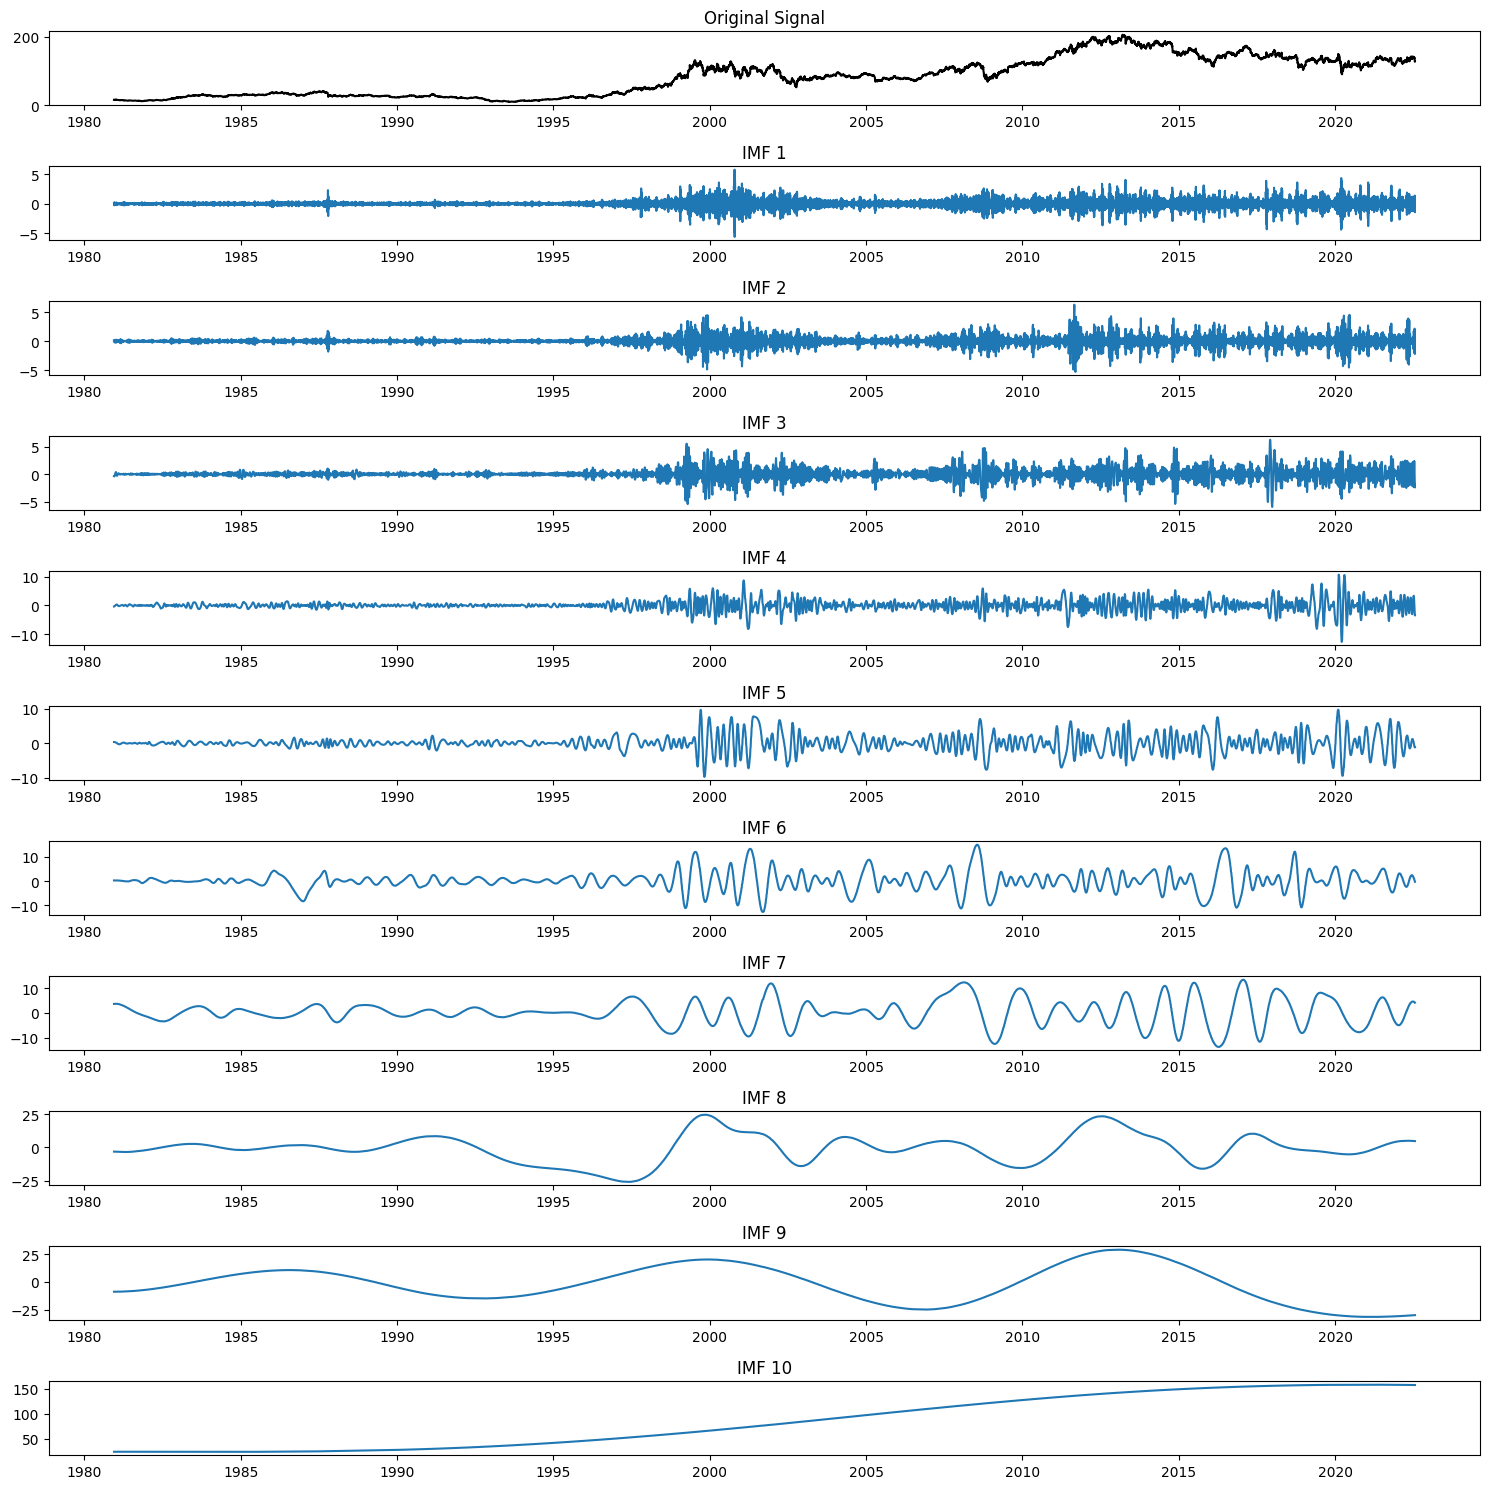

In [19]:
# Apply Empirical Mode Decomposition (EMD)
emd = EMD()
IMFs = emd(signal)


# Plot the original signal and its IMFs
plt.figure(figsize=(15, 15))

plt.subplot(len(IMFs) + 1, 1, 1)
plt.plot(df.index, signal, label='Original Signal', color='black')
plt.title('Original Signal')

for i in range(len(IMFs)):
    plt.subplot(len(IMFs) + 1, 1, i + 2)
    plt.plot(df.index, IMFs[i], label=f'IMF {i + 1}')
    plt.title(f'IMF {i + 1}')

plt.tight_layout()
plt.show()

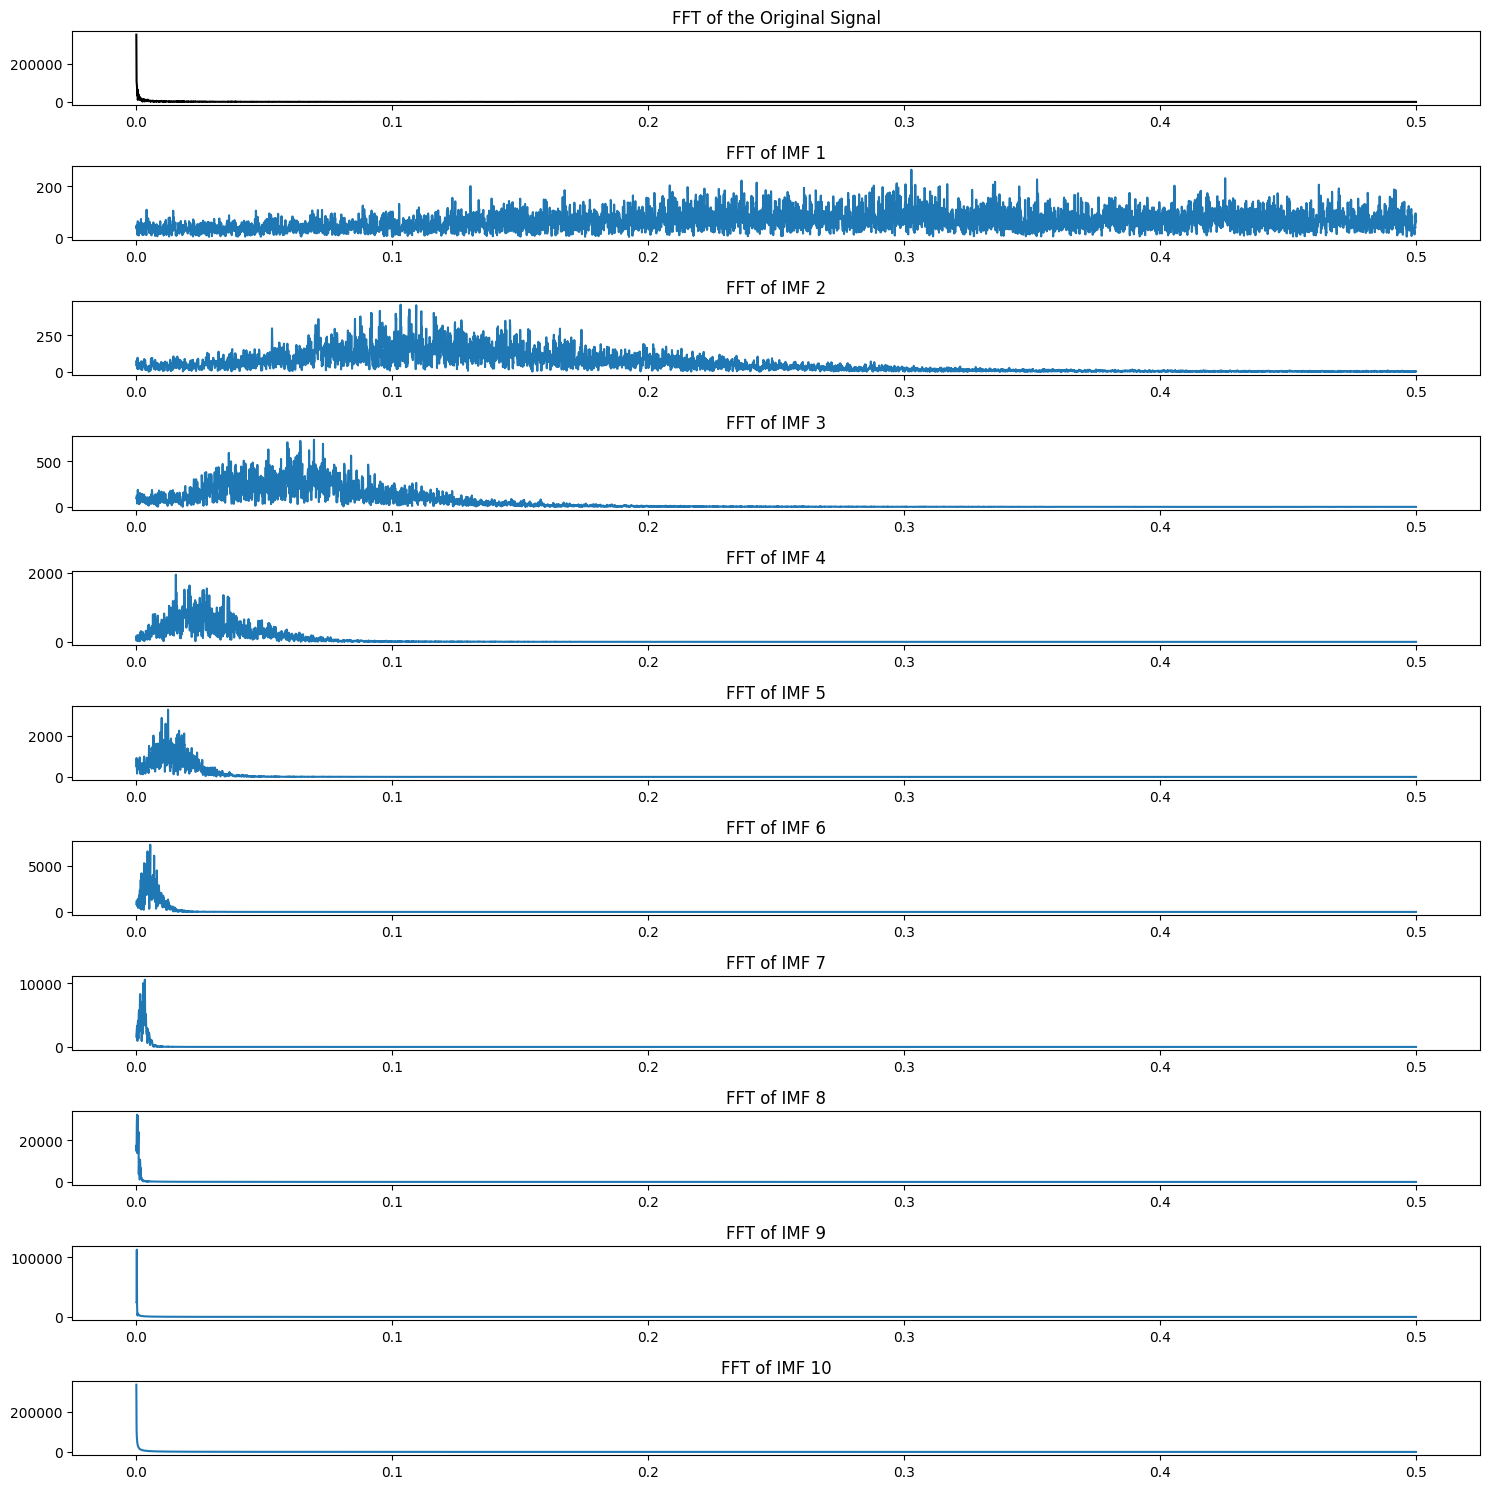

In [20]:
fs =  1

# Plot the original signal and its IMFs
plt.figure(figsize=(15, 15))

plt.subplot(len(IMFs) + 1, 1, 1)
positive_frequencies, magnitudes = get_fft(signal, fs)
plt.plot(positive_frequencies, magnitudes, label='Original Signal', color='black')
plt.title('FFT of the Original Signal')

for i in range(len(IMFs)):
    plt.subplot(len(IMFs) + 1, 1, i + 2)
    positive_frequencies, magnitudes = get_fft(IMFs[i], fs)
    plt.plot(positive_frequencies, magnitudes, label=f'IMF {i + 1}')
    plt.title(f'FFT of IMF {i + 1}')

plt.tight_layout()
plt.show()

In [21]:
# Calculate sampling frequency
periods=[]
days=len(signal)
for i, imf in enumerate(IMFs):
    freq, magnitudes = get_fft(imf, fs)
    idx=np.argmax(magnitudes)
    print("IMF idx: ", i)
    print("Dominant freq idx: ", idx)
    print("Window size: ",round(1/freq[idx]))
    print("\n")
    periods.append(round(1/freq[idx]))


IMF idx:  0
Dominant freq idx:  3176
Window size:  3


IMF idx:  1
Dominant freq idx:  1083
Window size:  10


IMF idx:  2
Dominant freq idx:  728
Window size:  14


IMF idx:  3
Dominant freq idx:  162
Window size:  64


IMF idx:  4
Dominant freq idx:  130
Window size:  80


IMF idx:  5
Dominant freq idx:  57
Window size:  181


IMF idx:  6
Dominant freq idx:  35
Window size:  291


IMF idx:  7
Dominant freq idx:  3
Window size:  2623


IMF idx:  8
Dominant freq idx:  2
Window size:  3497


IMF idx:  9
Dominant freq idx:  0
Window size:  10491




In [22]:
periods[:2]

[3, 10]

In [23]:
window_length_emd_fft = [1, 3, 10]

In [24]:
pecnet = Pecnet(experiment_name="IBM_exp3_1",
                sampling_periods=window_length_emd_fft,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

262/262 [==============================] - 0s 276us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


262/262 [==============================] - 0s 281us/step
Final train scores: RMSE: 65.7919692993164, R2: -0.6737040746670522, MAPE: 1.2178294658660889
66/66 [==============================] - 0s 284us/step
RMSE:  46.591225
R2:  -5.976450996638695
MAPE:  0.25856918


# EXP-3.2: EMD + WELCH

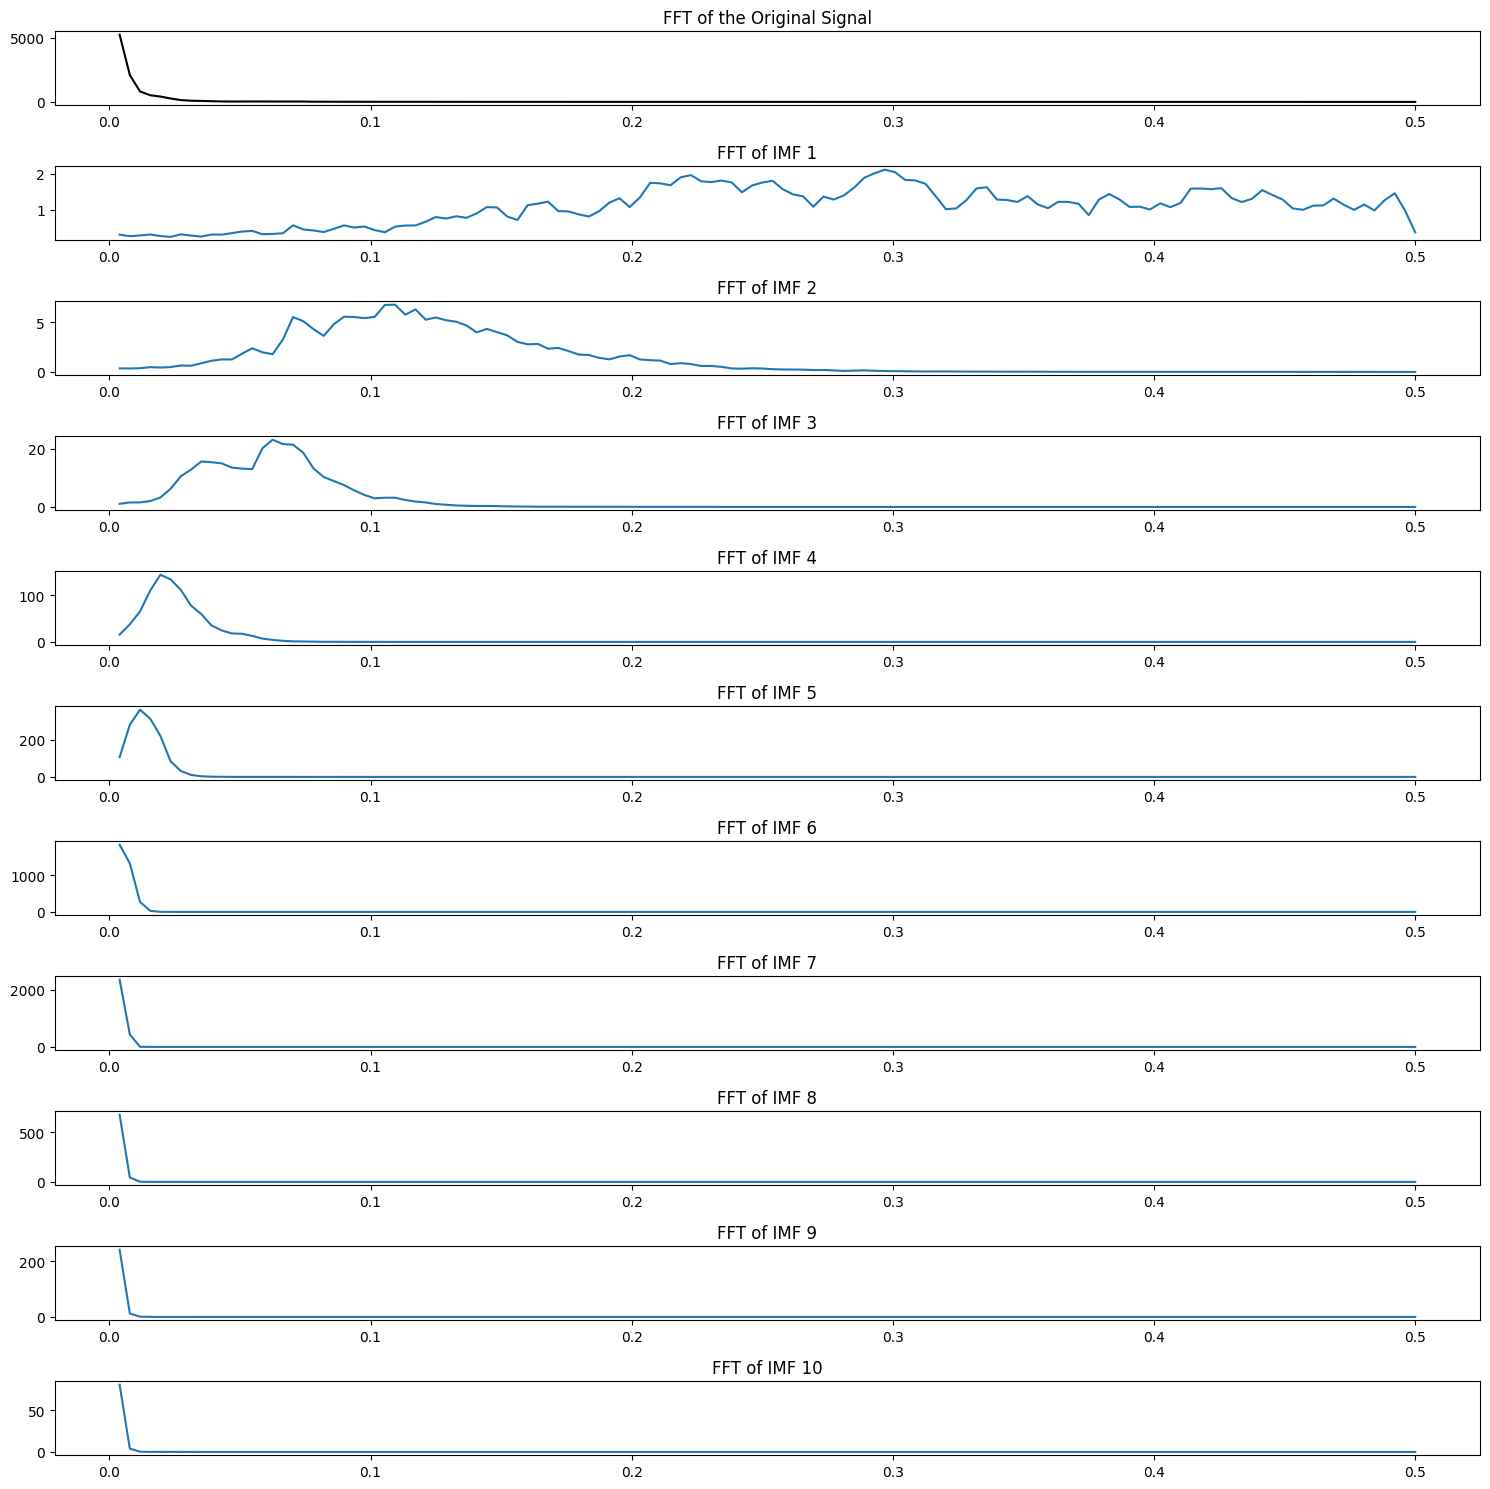

In [25]:
fs =  1

# Plot the original signal and its IMFs
plt.figure(figsize=(15, 15))

plt.subplot(len(IMFs) + 1, 1, 1)
positive_frequencies, magnitudes = get_psd_values(signal, fs)
plt.plot(positive_frequencies, magnitudes, label='Original Signal', color='black')
plt.title('FFT of the Original Signal')

for i in range(len(IMFs)):
    plt.subplot(len(IMFs) + 1, 1, i + 2)
    positive_frequencies, magnitudes = get_psd_values(IMFs[i], fs)
    plt.plot(positive_frequencies, magnitudes, label=f'IMF {i + 1}')
    plt.title(f'FFT of IMF {i + 1}')

plt.tight_layout()
plt.show()

In [26]:
# Calculate sampling frequency
periods=[]
days=len(signal)
for i, imf in enumerate(IMFs):
    freq, magnitudes = get_fft(imf, fs)
    idx=np.argmax(magnitudes)
    print("IMF idx: ", i)
    print("Dominant freq idx: ", idx)
    print("Window size: ",round(1/freq[idx]))
    print("\n")
    periods.append(round(1/freq[idx]))

IMF idx:  0
Dominant freq idx:  3176
Window size:  3


IMF idx:  1
Dominant freq idx:  1083
Window size:  10


IMF idx:  2
Dominant freq idx:  728
Window size:  14


IMF idx:  3
Dominant freq idx:  162
Window size:  64


IMF idx:  4
Dominant freq idx:  130
Window size:  80


IMF idx:  5
Dominant freq idx:  57
Window size:  181


IMF idx:  6
Dominant freq idx:  35
Window size:  291


IMF idx:  7
Dominant freq idx:  3
Window size:  2623


IMF idx:  8
Dominant freq idx:  2
Window size:  3497


IMF idx:  9
Dominant freq idx:  0
Window size:  10491




In [27]:
periods[:2]

[3, 10]

In [28]:
window_length_emd_welch = [1, 3, 10]

In [29]:
pecnet = Pecnet(experiment_name="IBM_exp3_2",
                sampling_periods=window_length_emd_welch,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

262/262 [==============================] - 0s 280us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


262/262 [==============================] - 0s 282us/step
Final train scores: RMSE: 64.2962646484375, R2: -0.5984695227715038, MAPE: 1.248115062713623
66/66 [==============================] - 0s 279us/step
RMSE:  41.533794
R2:  -4.544081443064169
MAPE:  0.2310893
